# ÊõæÊ≠£Ë±™ 0716325

In [1]:
import csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
x = []
y = []
data_freq = []
data_freq_e = []
data_freq_p = []

for idx in range(21):
    data_freq.append(defaultdict(int))
    data_freq_e.append(defaultdict(int))
    data_freq_p.append(defaultdict(int))

with open('agaricus-lepiota.data', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        y.append(row[0])
        x.append(row[1:11])
        x[-1].extend(row[12:23])

        for idx in range(21):
            data_freq[idx][x[-1][idx]] = 0
            data_freq_e[idx][x[-1][idx]] = 0
            data_freq_p[idx][x[-1][idx]] = 0
    
    for i in range(len(x)):
        if y[i] == 'e':
            for idx in range(21):
                data_freq_e[idx][x[i][idx]] += 1
        if y[i] == 'p':
            for idx in range(21):
                data_freq_p[idx][x[i][idx]] += 1
        for idx in range(21):
            data_freq[idx][x[i][idx]] += 1
            x[i][idx] = ord(x[i][idx]) - ord('a')

x = np.array(x)
y = np.array(y)

X_sparse = coo_matrix(x)
x, X_sparse, y = shuffle(x, X_sparse, y, random_state=9989)

# Data Input & Data Preprocessing

## Data Input
    ÈÄôÈÇäÁî±ÊñºdatasetÊ™îÊ°àÂÖßÂÆπÁ¨¶ÂêàcsvÊ†ºÂºèÔºåÊâÄ‰ª•ÊàëÈÄôÈÇä‰ΩøÁî®‰∫ÜcsvÈÄôÂÄãmodule‰æÜÂéªËÆÄÂèñdatasetÔºå‰∏¶‰∏îÊàë‰ΩøÁî®‰∫Üdata_freq„ÄÅdata_freq_e„ÄÅdata_freq_pÈÄô‰∏âÂÄãËÆäÊï∏‰æÜÂÑ≤Â≠òÊØè‰∏ÄÂÄãfeatureÂú®‰∏çÂêålabel‰∏ãÁöÑÂá∫ÁèæÈ†ªÁéá

## Data Preprocessing

### Drop features with any missing value.
    ÈÄôÈÇäÂõ†ÁÇ∫ÂèØ‰ª•ÊèêÂâçÁü•ÈÅìÁ¨¨11È†ÖfeatureÊòØÊúâmissing valueÁöÑÔºåÊâÄ‰ª•Âú®ËÆÄÂèñË≥áÊñôÁöÑÊôÇÂÄôÁõ¥Êé•‰∏çËÆÄÂèñÁ¨¨11È†Ö
### Transform data format and shape so your model can process them.
    ‰ΩøÁî®‰∫Ünp.array()Â∞áÂÖ∂ËΩâËÆäÁÇ∫numpy arrayÂΩ¢Âºè
### Shuffle the data.
    ÈÄôÈÇä‰ΩøÁî®‰∫Üsklearn.utilsË£°Èù¢ÁöÑshuffleÂáΩÁ§∫‰æÜÊâì‰∫Ç

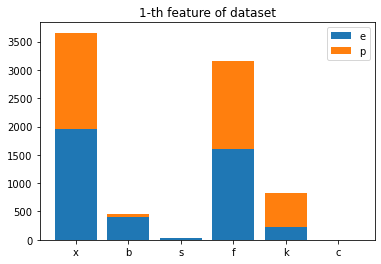

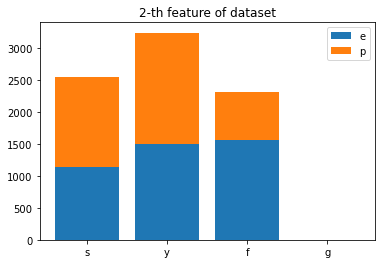

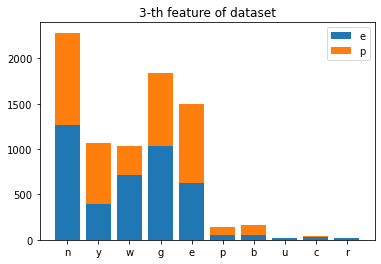

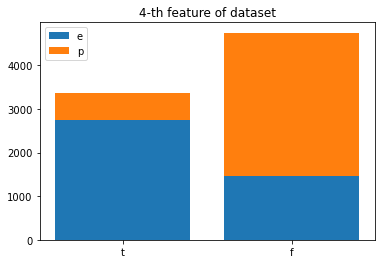

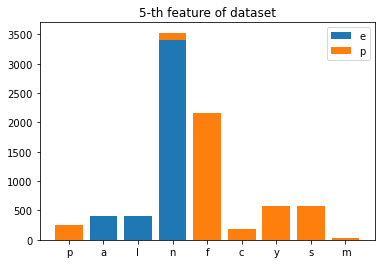

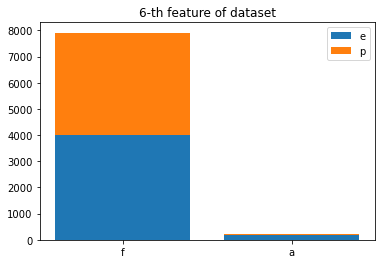

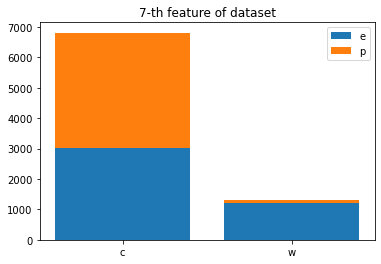

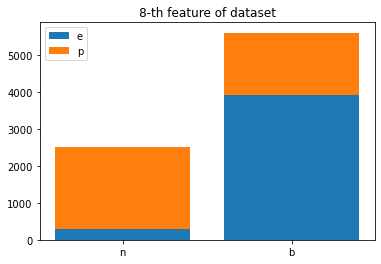

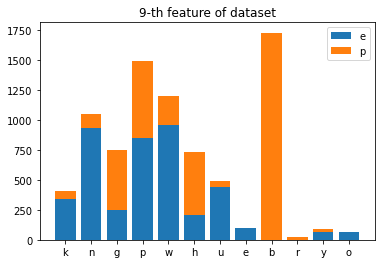

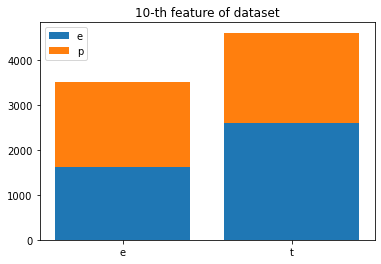

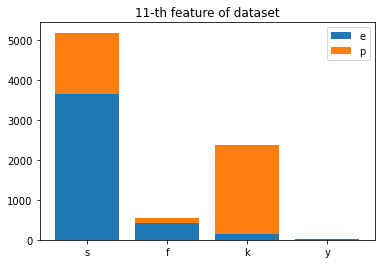

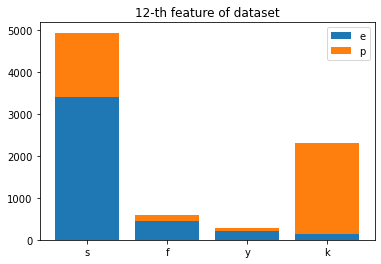

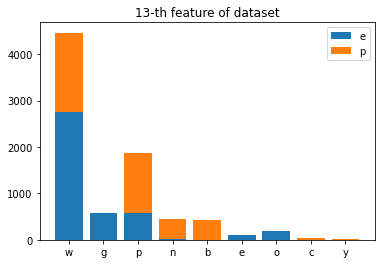

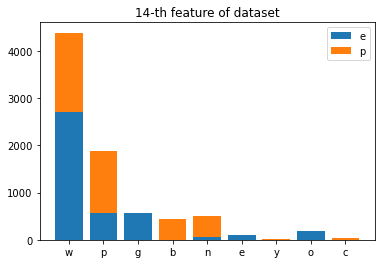

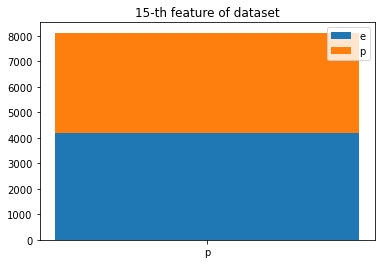

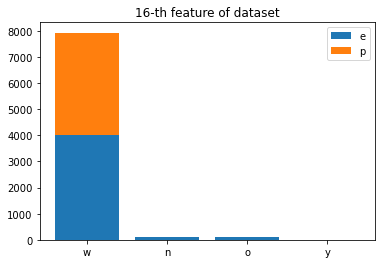

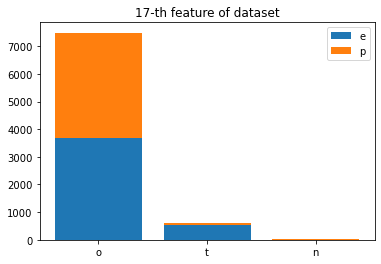

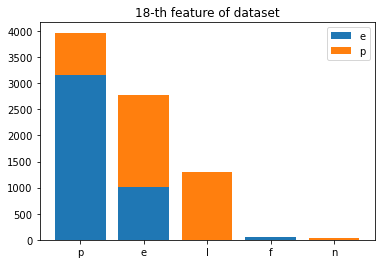

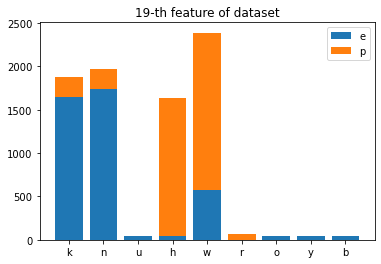

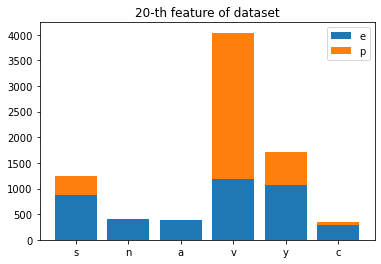

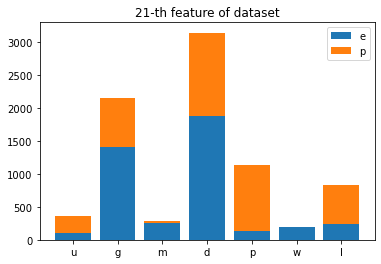

In [3]:
for idx in range(21):
    tolist = data_freq[idx].items()
    tolist_e = data_freq_e[idx].items()
    tolist_p = data_freq_p[idx].items()

    i, j = zip(*tolist) 
    i_e, j_e = zip(*tolist_e) 
    i_p, j_p = zip(*tolist_p) 

    plt.title(str(idx+1) + '-th feature of dataset')
    plt.bar(i_e, j_e, label='e')
    plt.bar(i_p, j_p, label='p', bottom=j_e)
    plt.legend()
    plt.show()
        

# Data Visualization
    ÈÄôÈÇäÊàëÂ∞áÂÖ©Á®ÆlabelÁöÑÂêÑÂÄãfeatureÂàÜÂ∏É‰ΩøÁî®Èï∑Ê¢ùÂúñÂç∞Âá∫‰æÜ

# Model Construction & Train-Test-Split & Results


C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


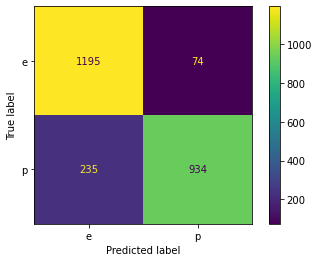

              precision    recall  f1-score   support

           e       0.84      0.94      0.89      1269
           p       0.93      0.80      0.86      1169

    accuracy                           0.87      2438
   macro avg       0.88      0.87      0.87      2438
weighted avg       0.88      0.87      0.87      2438



In [4]:
without_laplace = MultinomialNB(alpha=0.0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
without_laplace.fit(X_train, y_train)
y_pred = without_laplace.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=without_laplace.classes_).plot()
report = classification_report(y_test, y_pred)
plt.show()
print(report)

## Na√Øve Bayes Without Laplace smoothing & Holdout validation
### Model Construction
    ÈÄôÈÇäÊàë‰ΩøÁî®‰∫Üsklearn.naive_bayesË£°Èù¢ÁöÑMultinomialNBÔºå‰∏¶Â∞áalphaË®≠ÁÇ∫0‰æÜÂÅöÂá∫Ê≤íÊúâLaplace smoothingÁöÑNa√Øve Bayes model„ÄÇ
### Train-Test-Split
    Êé•ËëóÊàë‰ΩøÁî®sklearn.model_selectionÁöÑtrain_test_split‰æÜÂ∞ádataset‰ª•7:3ÁöÑÊØî‰æãÂàÜÁÇ∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ„ÄÇ‰∏¶‰ΩøÁî®modelÁöÑfitÂáΩÊï∏ÂéªË®ìÁ∑¥Ë®ìÁ∑¥ÈõÜÔºåpredictÂáΩÊï∏ÂéªÈ†êÊ∏¨Ê∏¨Ë©¶ÈõÜ„ÄÇ
### Results 
    ‰ΩøÁî®sklearn.metricsÁöÑconfusion_matrixÂéªËá™ÂãïÁîüÊàêConfusion matrixÔºå‰∏¶‰∏î‰ΩøÁî®ConfusionMatrixDisplayÂç∞Âá∫„ÄÇÊé•Ëëó‰ΩøÁî®sklearn.metricsÁöÑclassification_reportÂéªÂ∞áÊ∏¨Ë©¶ÈõÜÈ†êÊ∏¨ÁµêÊûúÁöÑÂàÜÊûêË≥áÊñôÂç∞Âá∫

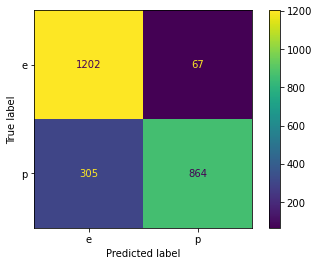

              precision    recall  f1-score   support

           e       0.80      0.95      0.87      1269
           p       0.93      0.74      0.82      1169

    accuracy                           0.85      2438
   macro avg       0.86      0.84      0.84      2438
weighted avg       0.86      0.85      0.85      2438



In [5]:
with_laplace = MultinomialNB(alpha=1000000)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
with_laplace.fit(X_train, y_train)
y_pred = with_laplace.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=with_laplace.classes_).plot()
plt.show()
print(report)



## Na√Øve Bayes With Laplace smoothing & Holdout validation
### Model Construction
    ÈÄôÈÇäÊàë‰ΩøÁî®‰∫Üsklearn.naive_bayesË£°Èù¢ÁöÑMultinomialNBÔºå‰∏¶Â∞áalphaË®≠ÁÇ∫10000000‰æÜÂÅöÂá∫ÊúâLaplace smoothingÁöÑNa√Øve Bayes model„ÄÇ
### Train-Test-Split
    Êé•ËëóÊàë‰ΩøÁî®sklearn.model_selectionÁöÑtrain_test_split‰æÜÂ∞ádataset‰ª•7:3ÁöÑÊØî‰æãÂàÜÁÇ∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ„ÄÇ‰∏¶‰ΩøÁî®modelÁöÑfitÂáΩÊï∏ÂéªË®ìÁ∑¥Ë®ìÁ∑¥ÈõÜÔºåpredictÂáΩÊï∏ÂéªÈ†êÊ∏¨Ê∏¨Ë©¶ÈõÜ„ÄÇ
### Results 
    ‰ΩøÁî®sklearn.metricsÁöÑconfusion_matrixÂéªËá™ÂãïÁîüÊàêConfusion matrixÔºå‰∏¶‰∏î‰ΩøÁî®ConfusionMatrixDisplayÂç∞Âá∫„ÄÇÊé•Ëëó‰ΩøÁî®sklearn.metricsÁöÑclassification_reportÂéªÂ∞áÊ∏¨Ë©¶ÈõÜÈ†êÊ∏¨ÁµêÊûúÁöÑÂàÜÊûêË≥áÊñôÂç∞Âá∫

C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


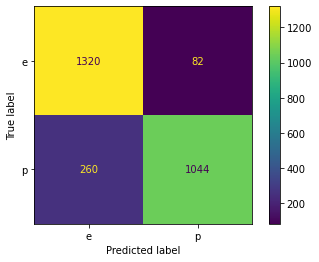

              precision    recall  f1-score   support

           e       0.84      0.94      0.88      4208
           p       0.93      0.80      0.86      3916

    accuracy                           0.87      8124
   macro avg       0.88      0.87      0.87      8124
weighted avg       0.88      0.87      0.87      8124



In [6]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
without_laplace = MultinomialNB(alpha=0.0)

true_class = []
pred_class = []
CM_list = np.zeros((2,2)).astype(int)


for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    without_laplace.fit(X_train, y_train)
    y_pred = without_laplace.predict(X_test)

    true_class.extend(y_test)
    pred_class.extend(y_pred)

    CM = confusion_matrix(y_test, y_pred)
    CM_list += CM
    
CM_list = CM_list // 3
report = classification_report(true_class, pred_class)
ConfusionMatrixDisplay(confusion_matrix=CM_list, display_labels=without_laplace.classes_).plot()
plt.show()
print(report)




## Na√Øve Bayes Without Laplace smoothing & K-fold cross-validation
### Model Construction
    ÈÄôÈÇäÊàë‰ΩøÁî®‰∫Üsklearn.naive_bayesË£°Èù¢ÁöÑMultinomialNBÔºå‰∏¶Â∞áalphaË®≠ÁÇ∫0‰æÜÂÅöÂá∫Ê≤íÊúâLaplace smoothingÁöÑNa√Øve Bayes model„ÄÇ
### Train-Test-Split
    Êé•ËëóÊàë‰ΩøÁî®sklearn.model_selectionÁöÑKFold‰æÜÂ∞ádataset‰ª•K=3ÁöÑÊñπÂºèÂÅöÂá∫K-fold cross-validation„ÄÇ
    ‰∏¶Âú®ÊØè‰∏ÄËº™Áï∂‰∏≠Ôºå‰ΩøÁî®modelÁöÑfitÂáΩÊï∏ÂéªË®ìÁ∑¥Ë®ìÁ∑¥ÈõÜÔºåpredictÂáΩÊï∏ÂéªÈ†êÊ∏¨Ê∏¨Ë©¶ÈõÜ„ÄÇ
### Results 
    ‰ΩøÁî®sklearn.metricsÁöÑconfusion_matrixÂéªËá™ÂãïÁîüÊàêConfusion matrixÔºå‰∏¶‰∏î‰ΩøÁî®ConfusionMatrixDisplayÂç∞Âá∫„ÄÇÊé•Ëëó‰ΩøÁî®sklearn.metricsÁöÑclassification_reportÂéªÂ∞áÊ∏¨Ë©¶ÈõÜÈ†êÊ∏¨ÁµêÊûúÁöÑÂàÜÊûêË≥áÊñôÂç∞Âá∫

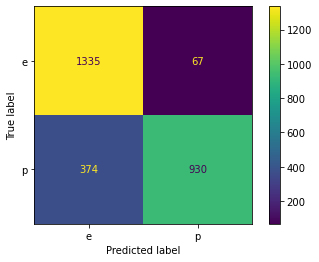

              precision    recall  f1-score   support

           e       0.78      0.95      0.86      4208
           p       0.93      0.71      0.81      3916

    accuracy                           0.84      8124
   macro avg       0.86      0.83      0.83      8124
weighted avg       0.85      0.84      0.83      8124



In [7]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
with_laplace = MultinomialNB(alpha=1000000)

true_class = []
pred_class = []
CM_list = np.zeros((2,2)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    with_laplace.fit(X_train, y_train)
    y_pred = with_laplace.predict(X_test)

    true_class.extend(y_test)
    pred_class.extend(y_pred)

    CM = confusion_matrix(y_test, y_pred)
    CM_list += CM

CM_list = CM_list // 3
report = classification_report(true_class, pred_class)
ConfusionMatrixDisplay(confusion_matrix=CM_list, display_labels=with_laplace.classes_).plot()
plt.show()
print(report)


## Na√Øve Bayes With Laplace smoothing & K-fold cross-validation
### Model Construction
    ÈÄôÈÇäÊàë‰ΩøÁî®‰∫Üsklearn.naive_bayesË£°Èù¢ÁöÑMultinomialNBÔºå‰∏¶Â∞áalphaË®≠ÁÇ∫0‰æÜÂÅöÂá∫Ê≤íÊúâLaplace smoothingÁöÑNa√Øve Bayes model„ÄÇ
### Train-Test-Split
    Êé•ËëóÊàë‰ΩøÁî®sklearn.model_selectionÁöÑKFold‰æÜÂ∞ádataset‰ª•K=3ÁöÑÊñπÂºèÂÅöÂá∫K-fold cross-validation„ÄÇ
    ‰∏¶Âú®ÊØè‰∏ÄËº™Áï∂‰∏≠Ôºå‰ΩøÁî®modelÁöÑfitÂáΩÊï∏ÂéªË®ìÁ∑¥Ë®ìÁ∑¥ÈõÜÔºåpredictÂáΩÊï∏ÂéªÈ†êÊ∏¨Ê∏¨Ë©¶ÈõÜ„ÄÇ
### Results 
    ‰ΩøÁî®sklearn.metricsÁöÑconfusion_matrixÂéªËá™ÂãïÁîüÊàêConfusion matrixÔºå‰∏¶‰∏î‰ΩøÁî®ConfusionMatrixDisplayÂç∞Âá∫„ÄÇÊé•Ëëó‰ΩøÁî®sklearn.metricsÁöÑclassification_reportÂéªÂ∞áÊ∏¨Ë©¶ÈõÜÈ†êÊ∏¨ÁµêÊûúÁöÑÂàÜÊûêË≥áÊñôÂç∞Âá∫

# Comparison & Conclusion

    ÈáùÂ∞ç‰ΩøÁî®Holdout validation‰ª•ÂèäK-fold cross-validationÂÅöÊØîËºÉÔºåÂèØ‰ª•ÁôºÁèæÂú®ÂÖ∂‰ªñÊ¢ù‰ª∂Áõ∏ÂêåÁöÑÊÉÖÊ≥Å‰∏ãÔºåHoldout validationÁöÑÊ∫ñÁ¢∫ÁéáËàáK-fold cross-validationÂπ≥ÂùáÁöÑÊ∫ñÁ¢∫ÁéáÊòØÂ∑Æ‰∏çÂ§öÁöÑÔºåÁåúÊ∏¨ÊáâË©≤ÊòØÂõ†ÁÇ∫‰∫ãÂâçÊúâÂÅöshuffleÔºå‰ª•ÂèäÂÖ©ËÄÖÁöÑÊ∏¨Ë©¶ÈõÜÂ§ßÂ∞èÂ∑Æ‰∏çÂ§ö(30%‰ª•Âèä33%)ÁöÑÁ∑£ÊïÖ

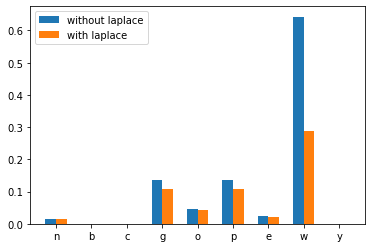

In [14]:
k = 1
NY = 0
tau = {'n':0, 'b':0, 'c':0, 'g':0, 'o':0, 'p':0, 'e':0, 'w':0, 'y':0}
NX = {'n':0, 'b':0, 'c':0, 'g':0, 'o':0, 'p':0, 'e':0, 'w':0, 'y':0}

for idx in range(len(x)):
    if y[idx] == 'e':
        NY += 1
        temp = chr(x[idx][13] + ord('a'))
        NX[ temp ] += 1
    tau[ temp ] += 1

P = {}
for idx in NX:
    P[idx] = NX[idx] / NY
P = P.items()
i, j = zip(*P) 


P_l = {}
for idx in NX:
    P_l[idx] = (NX[idx] + k) / (NY + k * tau[idx])
P_l = P_l.items()
i_l, j_l = zip(*P_l) 


x_label = np.arange(len(i))
plt.bar(x_label, j, 0.3, label='without laplace')
plt.bar(x_label+0.3, j_l, 0.3, label='with laplace')
plt.xticks(x_label + 0.3 / 2, i)
plt.legend()
plt.show()


# Questions 
## with Laplace smoothing:

$$ P(X_{ùë†ùë°ùëéùëôùëò‚àíùëêùëúùëôùëúùëü‚àíùëèùëíùëôùëúùë§‚àíùëüùëñùëõùëî} | Y = e) =  \frac {N(X_{ùë†ùë°ùëéùëôùëò‚àíùëêùëúùëôùëúùëü‚àíùëèùëíùëôùëúùë§‚àíùëüùëñùëõùëî} | Y = e) + k} {N(Y = e) + k\tau} $$

## without Laplace smoothing:

$$ P(X_{ùë†ùë°ùëéùëôùëò‚àíùëêùëúùëôùëúùëü‚àíùëèùëíùëôùëúùë§‚àíùëüùëñùëõùëî} | Y = e) =  \frac {N(X_{ùë†ùë°ùëéùëôùëò‚àíùëêùëúùëôùëúùëü‚àíùëèùëíùëôùëúùë§‚àíùëüùëñùëõùëî} | Y = e)} {N(Y = e)} $$


Â∞±Áõ¥Êé•ÁÖßÂÖ¨ÂºèË®àÁÆóÂæóÂá∫Ôºå‰∏¶Áπ™Ë£ΩÊñºÂúñË°®‰∏ä